<a href="https://colab.research.google.com/github/Jittiya/multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis?fbclid=IwAR0i1h5xhdJLGhJ3Pty5JieF47lablYiHAD4q16OIHGhsCIEGUQJGT4-DeE

Assumptions:

In [2]:
import pandas as pd

In [13]:
BFI_data = pd.read_csv('/content/bfi.csv')
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


##Factor Analysis'

##Assumption:

ในข้อมูล multivariate ที่มีตัวแปร observe variables จำนวน n ตัว

มีตัวแปร Factor (Latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้

โดย k < n

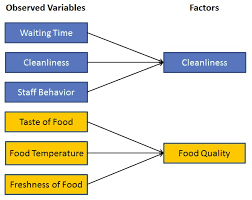

# Assumptions ในการทำ Factor Analysis:

* There are no outliers in data.

* Sample size should be greater than the factor.

* There should not be perfect ***multicollinearity***.

* There should not be ***homoscedasticity*** between the variables.

การกระจายของข้อมูล

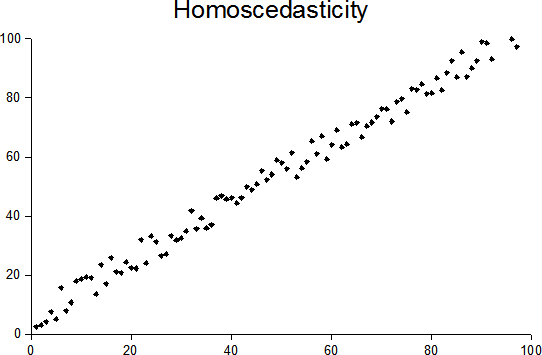

## การทำ Factor Analysis

In [14]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

#ตอนแรกมันจะ error ว่า No module named 'factor_analyzer'

แก้ไข error No module named 'factor_analyzer'

ด้วย !pip install factor_analyzer

วิธี install package อื่นๆ

In [15]:
!pip install factor_analyzer

In [16]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt    # = from matplotlib import pyplot as plt

## Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,a3,...,o3,o4,o5 ด้วยคำสั่ง  ``` .iloc[] ```



In [17]:
BFI_data_dropped = BFI_data.iloc[:,26]
BFI_data_dropped

0       1
1       2
2       2
3       2
4       1
       ..
2795    1
2796    1
2797    2
2798    1
2799    2
Name: gender, Length: 2800, dtype: int64

In [29]:
## เฉลย
BFI_data_dropped = BFI_data.iloc[:,1:-3]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2


In [30]:
BFI_data_dropped = BFI_data_dropped.dropna()

In [31]:
BFI_data_dropped.shape

(2468, 22)

## Bartlett’s test

In [36]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped)

chi_square_value, p_value

(16304.605602577736, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

## Kaiser-Meyer-Olkin (KMO) Test

ถ้า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis

In [37]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)

kmo_model

0.8429797690197695

## Factor Analysis

Import

In [38]:
from factor_analyzer import  FactorAnalyzer

define


In [40]:
fa = FactorAnalyzer(n_factors=20)

## Fit-transform

In [43]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [44]:
data_fa.shape

(2468, 20)

วิธีตัดสินว่าเราจะลดเหลือกี่ dimention (มี factor )

In [47]:
 ev, v = fa.get_eigenvalues()

#ใช้ eigen values

In [48]:
ev

array([4.91141931, 2.63626827, 2.08251267, 1.53464428, 1.21532714,
       1.0178061 , 0.80019041, 0.78952077, 0.70179112, 0.67312551,
       0.62767128, 0.57413109, 0.55484364, 0.53049665, 0.51834636,
       0.48900237, 0.4715587 , 0.4290295 , 0.40253546, 0.3898259 ,
       0.38463837, 0.26531509])

# Scree plot

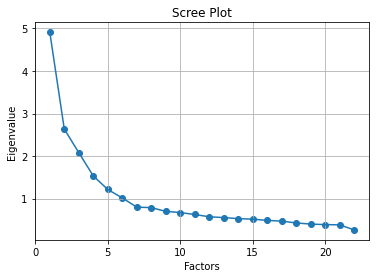

In [49]:
# Create scree plot using matplotlib
plt.scatter(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev)
plt.plot(range(1,BFI_data_dropped.shape[1]+1),BFI_data_dropped.shape[1]+1*[1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()

fa.analyze(BFI_data_dropped, 25, rotation=None)
# Checl Ejgenvalues
